In [7]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

1. Load Model

In [30]:
weight_path = 'model.pt'
model = YOLO(weight_path)
threshold = 0.5

In [33]:
def test_true(imgname):
  path = os.path.join('path-to-data/test/labels', imgname + '.txt')
  with open(path, 'r') as f:
    return len(f.read().split('\n')) 
def test_pred(imgname, threshold=0.5):
  path = os.path.join('path-to-data/test/images', imgname + '.jpg')
  img = cv2.imread(path)
  bboxes = model(img, verbose=False)[0].boxes.data.tolist()
  valid_bboxes = list(filter(lambda x: x[4] > threshold, bboxes))
  return len(valid_bboxes)

In [34]:
test_set = os.listdir('path-to-data/test/labels')
test_set = ['.'.join(file.split('.')[:-1]) for file in test_set]
true_count = np.array([test_true(i) for i in test_set])
pred_count = np.array([test_pred(i) for i in test_set])

2. Calculate accuracy

In [35]:
cmp = true_count == pred_count
true_pred = cmp.sum()
accuracy = true_pred/len(true_count)
print(accuracy)

0.8


In [3]:
def visualize(img, bboxes):
  h, w = img.shape[:2]
  for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    # print((x1, x2, y1, y2))
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
  plt.imshow(img)


[[101.03401184082031, 78.45654296875, 502.57757568359375, 598.9715576171875, 0.8913862705230713, 0.0]]


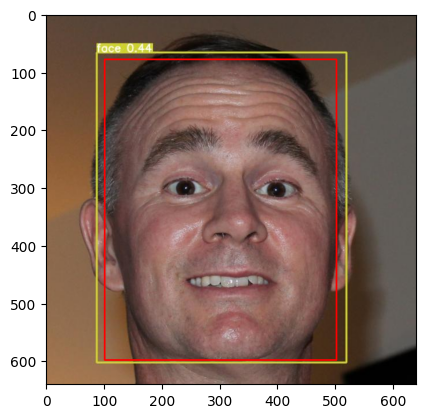

In [5]:
img = cv2.imread('face-1/test/images/D_0218_png.rf.f032f19a9dcc5523d4a2fdf4463500c5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = model(img)
print(result[0].boxes.data.tolist())
bboxes = []
for bbox in result[0].boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = bbox
  if score > threshold:
    bboxes += [[int(x1),int(y1),int(x2),int(y2)]]
visualize(img, bboxes)